<div style="display: flex; justify-content: center;">
    <img src="imagenes/gruapor.png" style="border-radius: 20px; width: 75%;">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
from scipy.stats import ttest_ind 
from scipy import stats
from scipy.stats import f_oneway

Ahora cargaremos los DataFrames de entradas para poder trabajar con ellos. Se llaman entradas porque hacen referencia a su entrada en el depósito municipal de vehículos.

In [2]:

df_todos = pd.read_parquet(r"C:/Users/pepea\Desktop/the_drige/EDA/entradas_validas/df_entradas_util.parquet") #Todos hace referencia a todos los años
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316777 entries, CO20160101002327 to ES20240101005308
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   deposito      316763 non-null  object        
 1   tipoVehiculo  316763 non-null  object        
 2   motivo        316763 non-null  float64       
 3   turno         316763 non-null  object        
 4   Fecha_e       316763 non-null  datetime64[ns]
 5   FinDeSema     316777 non-null  bool          
 6   Festivo       316777 non-null  object        
 7   Hora_e        316763 non-null  object        
 8   grua          315330 non-null  object        
 9   tipoVia       316763 non-null  object        
 10  via           316763 non-null  object        
 11  numero        294259 non-null  object        
 12  cp            304594 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(10)
memory usage: 31.7+ MB


In [3]:
df_todos.head(10)

,deposito,tipoVehiculo,motivo,turno,Fecha_e,FinDeSema,Festivo,Hora_e,grua,tipoVia,via,numero,cp
idVehiculo,,,,,,,,,,,,,
CO20160101002327,Colón,Coche,1.0,Noche,2016-01-01,False,Año Nuevo,00:05:00,S032,CALLE,RIOCABADO,19,28047
CO20160101012710,Colón,Coche,9.0,Noche,2016-01-01,False,Año Nuevo,01:14:00,S219,CALLE,SANTA VIRGILIA,19,28033
CO20160101031613,Colón,Coche,44.0,Noche,2016-01-01,False,Año Nuevo,02:42:00,S223,TRAVESIA,LONGARES,10,28022
CO20160101031820,Colón,Coche,1.0,Noche,2016-01-01,False,Año Nuevo,02:50:00,S221,CALLE,HACIENDA DE PAVONES,89,28030
CO20160101031435,Colón,Coche,7.0,Noche,2016-01-01,False,Año Nuevo,03:05:00,S271,CALLE,MARTINEZ VILLERGAS,3,28027
CO20160101033909,Colón,Coche,6.0,Noche,2016-01-01,False,Año Nuevo,03:30:00,S272,CALLE,MOVINDA,14,28037
CO20160101054347,Colón,Motocicleta,39.0,Noche,2016-01-01,False,Año Nuevo,05:40:00,S221,CALLE,COMANDANTE FONTANES,73,28019
CO20160101070514,Colón,Coche,13.0,Noche,2016-01-01,False,Año Nuevo,07:00:00,S228,AVENIDA,CARABANCHEL ALTO,0,0
ES20160101075109,Escuadrón,Coche,13.0,Mañana,2016-01-01,False,Año Nuevo,07:49:00,S274,CALLE,FUENCARRAL,100,28010


Ahora cargaremos los de cada año de forma individual.

In [4]:
years = ["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

for a in years:
    print(f'df_entrada{a} = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas{a}_util.parquet")')
    print()

df_entrada2016 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2016_util.parquet")

df_entrada2017 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2017_util.parquet")

df_entrada2018 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2018_util.parquet")

df_entrada2019 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2019_util.parquet")

df_entrada2020 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2020_util.parquet")

df_entrada2021 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2021_util.parquet")

df_entrada2022 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2022_util.parquet")

df_entrada2023 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2023_util.parquet")



In [5]:
df_entrada2016 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2016_util.parquet")

df_entrada2017 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2017_util.parquet")

df_entrada2018 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2018_util.parquet")

df_entrada2019 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2019_util.parquet")

df_entrada2020 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2020_util.parquet")

df_entrada2021 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2021_util.parquet")

df_entrada2022 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2022_util.parquet")

df_entrada2023 = pd.read_parquet("C:/Users/pepea/Desktop/the_drige/EDA/entradas_validas/entradas2023_util.parquet")



In [6]:
df_entrada2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32714 entries, CO20200101030251 to ES20201231234746
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   deposito      32712 non-null  object        
 1   tipoVehiculo  32712 non-null  object        
 2   motivo        32712 non-null  float64       
 3   turno         32712 non-null  object        
 4   Fecha_e       32712 non-null  datetime64[ns]
 5   FinDeSema     32714 non-null  bool          
 6   Festivo       32714 non-null  object        
 7   Hora_e        32712 non-null  object        
 8   grua          32651 non-null  object        
 9   tipoVia       32712 non-null  object        
 10  via           32712 non-null  object        
 11  numero        30815 non-null  object        
 12  cp            31737 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(10)
memory usage: 3.3+ MB


Ya hemos cargado los DataFrames, tanto de cada año como el que contiene todos los años. Ahora podemos trabajar con ellos.

In [7]:
print("Vehiculos_retirados= {")
for year in years:
    print(f"'Año {year}': {globals()['df_entrada' + str(year)].shape[0]},")


Vehiculos_retirados= {
'Año 2016': 39724,
'Año 2017': 44113,
'Año 2018': 41223,
'Año 2019': 43291,
'Año 2020': 32714,
'Año 2021': 38737,
'Año 2022': 39151,
'Año 2023': 37824,


In [8]:
Vehiculos_retirados= {
'Año 2016': 39724,
'Año 2017': 44113,
'Año 2018': 41223,
'Año 2019': 43291,
'Año 2020': 32714,
'Año 2021': 38737,
'Año 2022': 39151,
'Año 2023': 37824}

retirados = pd.DataFrame(Vehiculos_retirados.items(), columns=['Año', 'Número de Vehículos Retirados'])
retirados.set_index('Año', inplace=True)
retirados

,Número de Vehículos Retirados
Año,
Año 2016,39724
Año 2017,44113
Año 2018,41223
Año 2019,43291
Año 2020,32714
Año 2021,38737
Año 2022,39151
Año 2023,37824


In [9]:
vehiculo_mas = retirados['Número de Vehículos Retirados'].max() 
año_mas =retirados['Número de Vehículos Retirados'].idxmax()
vehiculo_menos = retirados['Número de Vehículos Retirados'].min()
año_menos =retirados['Número de Vehículos Retirados'].idxmin()
media = retirados['Número de Vehículos Retirados'].mean() 
todos = df_todos.shape[0]
print(f"Desde 2016 hasta 2023, las grúas municipales retiraron un total de {todos} vehículos de las calles de Madrid capital,")
print(f"con un promedio de {media} vehículos retirados por año. El {año_mas} fue el año en que se retiró la mayor cantidad, con {vehiculo_mas} vehículos retirados.")
print(f"El {año_menos} fue el año con la menor cantidad de vehículos retirados, con un total de {vehiculo_menos} vehículos retirados de las calles.")
print(f"La diferencia entre ambos años es de {vehiculo_mas - vehiculo_menos} vehículos. Estudiaremos si hay alguna diferencia significativa.")

Desde 2016 hasta 2023, las grúas municipales retiraron un total de 316777 vehículos de las calles de Madrid capital,
con un promedio de 39597.125 vehículos retirados por año. El Año 2017 fue el año en que se retiró la mayor cantidad, con 44113 vehículos retirados.
El Año 2020 fue el año con la menor cantidad de vehículos retirados, con un total de 32714 vehículos retirados de las calles.
La diferencia entre ambos años es de 11399 vehículos. Estudiaremos si hay alguna diferencia significativa.


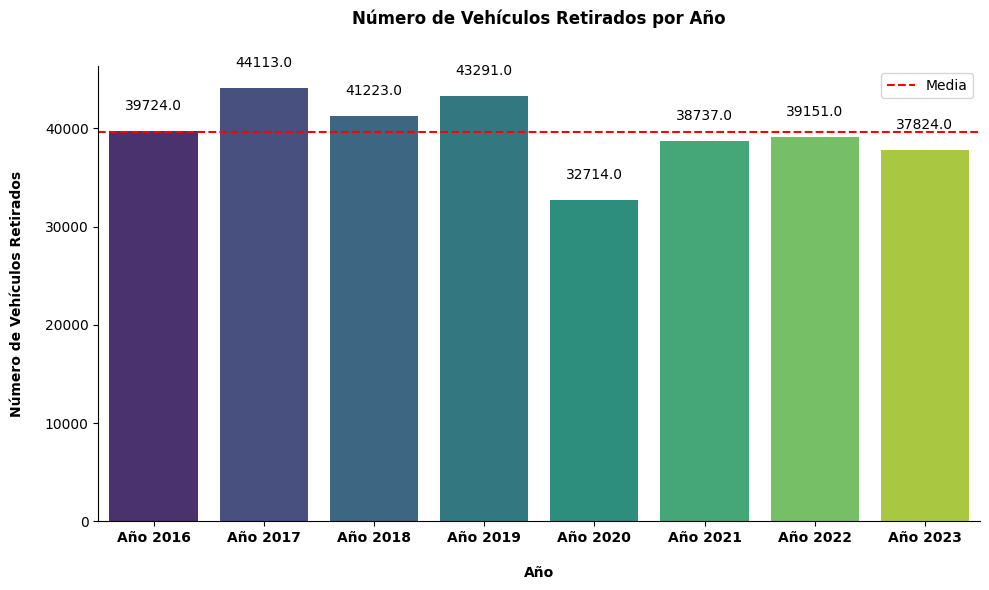

In [10]:
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=retirados.index, y='Número de Vehículos Retirados', data=retirados, hue=retirados.index, palette='viridis', legend=False)
plt.title('Número de Vehículos Retirados por Año', fontweight='bold', pad=30)
plt.xlabel('Año', labelpad=15, fontweight='bold')
plt.ylabel('Número de Vehículos Retirados', labelpad=15, fontweight='bold')
plt.xticks(fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                xytext=(0, 18),
                textcoords='offset points')

plt.axhline(y=media, color='r', linestyle='--', label='Media')
sns.despine()
plt.tight_layout()
plt.legend()
plt.savefig("figura_entrada/barrasTodos.png")
plt.show()


>Observamos que en el año 2020, conocido como 'el año de la pandemia', es cuando menos vehículos se retiraron. Además, su diferencia con respecto a la media es la mayor.

In [11]:
agrupado2016 = df_entrada2016.groupby(df_entrada2016['Fecha_e'].dt.date).size()
agrupado2017 = df_entrada2017.groupby(df_entrada2017['Fecha_e'].dt.date).size()
agrupado2018 = df_entrada2018.groupby(df_entrada2018['Fecha_e'].dt.date).size()
agrupado2019 = df_entrada2019.groupby(df_entrada2019['Fecha_e'].dt.date).size()
agrupado2020 = df_entrada2020.groupby(df_entrada2020['Fecha_e'].dt.date).size()
agrupado2021 = df_entrada2021.groupby(df_entrada2021['Fecha_e'].dt.date).size()
agrupado2022 = df_entrada2022.groupby(df_entrada2022['Fecha_e'].dt.date).size()
agrupado2023 = df_entrada2023.groupby(df_entrada2023['Fecha_e'].dt.date).size()

Crearemos los DataFrame para ver la evolución anual de la retirada de vehículos. En principio, cabe esperar que en verano habrá menos y todos los años serán parecidos, excepto durante la pandemia.

In [12]:
#Para 2017
agrupado2017.index = pd.to_datetime(agrupado2017.index)
agrupado2017.index = agrupado2017.index.strftime('%d-%B')
df_agru2017 = pd.DataFrame({'2017': agrupado2017.values}, index=agrupado2017.index)
# Para 2018
agrupado2018.index = pd.to_datetime(agrupado2018.index)
agrupado2018.index = agrupado2018.index.strftime('%d-%B')
df_agru2018 = pd.DataFrame({'2018': agrupado2018.values}, index=agrupado2018.index)
# Para 2019
agrupado2019.index = pd.to_datetime(agrupado2019.index)
agrupado2019.index = agrupado2019.index.strftime('%d-%B')
df_agru2019 = pd.DataFrame({'2019': agrupado2019.values}, index=agrupado2019.index) 
# Para 2021
agrupado2021.index = pd.to_datetime(agrupado2021.index)
agrupado2021.index = agrupado2021.index.strftime('%d-%B')
df_agru2021 = pd.DataFrame({'2021': agrupado2021.values}, index=agrupado2021.index) 
# Para 2022
agrupado2022.index = pd.to_datetime(agrupado2022.index)
agrupado2022.index = agrupado2022.index.strftime('%d-%B')
df_agru2022 = pd.DataFrame({'2022': agrupado2022.values}, index=agrupado2022.index) 
# Para 2023
agrupado2023.index = pd.to_datetime(agrupado2023.index)
agrupado2023.index = agrupado2023.index.strftime('%d-%B')
df_agru2023 = pd.DataFrame({'2023': agrupado2023.values}, index=agrupado2023.index)
#bisiestos
# Para 2016
agrupado2016.index = pd.to_datetime(agrupado2016.index)
agrupado2016.index = agrupado2016.index.strftime('%d-%B')
df_agru2016 = pd.DataFrame({'2016': agrupado2016.values}, index=agrupado2016.index) 
# Para 2020
agrupado2020.index = pd.to_datetime(agrupado2020.index)
agrupado2020.index = agrupado2020.index.strftime('%d-%B')
df_agru2020 = pd.DataFrame({'2020': agrupado2020.values}, index=agrupado2020.index)


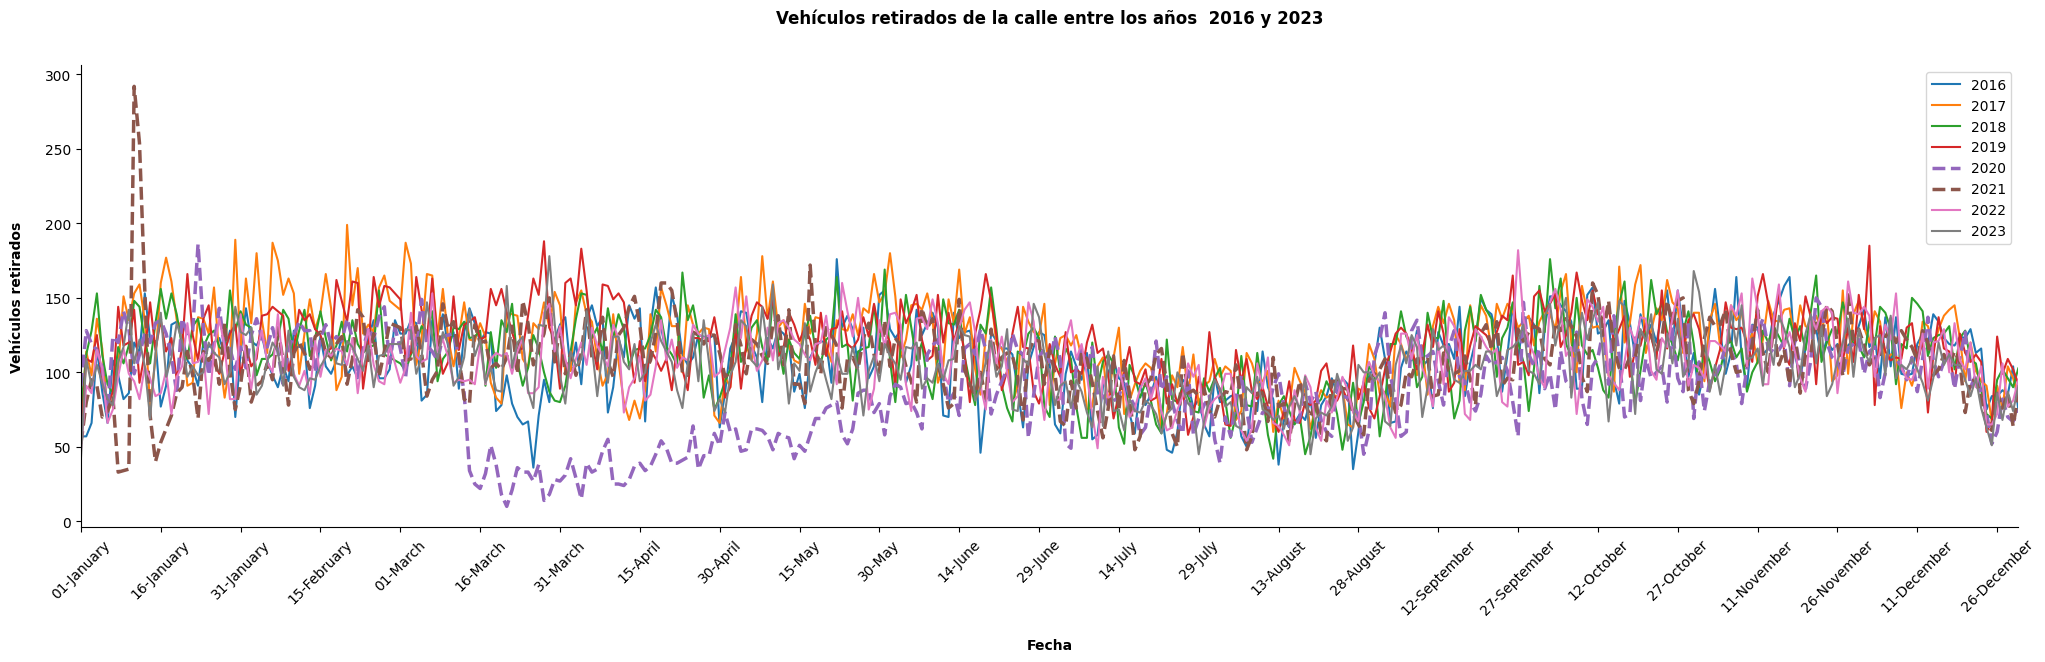

In [13]:
plt.figure(figsize=(25, 6))

plt.plot(df_agru2016.index, df_agru2016['2016'], label='2016')
plt.plot(df_agru2017.index, df_agru2017['2017'], label='2017')
plt.plot(df_agru2018.index, df_agru2018['2018'], label='2018')
plt.plot(df_agru2019.index, df_agru2019['2019'], label='2019')
plt.plot(df_agru2020.index, df_agru2020['2020'], label='2020', linestyle='--', linewidth=2.5 )
plt.plot(df_agru2021.index, df_agru2021['2021'], label='2021', linewidth=2.5, linestyle='--')
plt.plot(df_agru2022.index, df_agru2022['2022'], label='2022')
plt.plot(df_agru2023.index, df_agru2023['2023'], label='2023')

# Personalizar la figura
plt.title('Vehículos retirados de la calle entre los años  2016 y 2023',  fontweight='bold', pad=30)
plt.xlabel('Fecha', labelpad=15, fontweight='bold')
plt.ylabel('Vehículos retirados', labelpad=15, fontweight='bold')
plt.legend()
sns.despine()
# Establecer las etiquetas del eje x para mostrar solo una de cada 15 fechas
plt.xticks(df_agru2016.index[::15], rotation=45)
plt.xlim('01-January', '30-December')
# Mostrar la figura
plt.savefig("figura_entrada/evolu.png")
plt.show()

Esta figura tiene un exceso de información, por lo que resulta confusa y poco útil. Aunque, por otra parte, refleja algunos acontecimientos importantes.  
La bajada en la cantidad de vehículos durante el confinamiento se ve claramente reflejada (línea morada discontinua).  
El efecto del temporal Filomena, un gran aumento en la cantidad de vehículos retirados, queda reflejado en el mayor pico (línea marrón discontinua).  
Además, se puede ver cómo "en verano Madrid se queda vacía", lo cual también se refleja en el número de vehículos retirados.  

In [14]:
filomena = df_agru2021.iloc[7:14]
filomena

,2021
Fecha_e,
08-January,33
10-January,35
11-January,292
12-January,254
13-January,155
14-January,71
15-January,40


Al intentar unir los DataFrames, no se puede. Veremos cuáles tienen longitud distinta. (Ya sabemos que los años bisiestos tienen un día más).

In [15]:
print(f'2016 {df_agru2016.shape[0]}')
print(f'2017 {df_agru2017.shape[0]}')
print(f'2018 {df_agru2018.shape[0]}')
print(f'2019 {df_agru2019.shape[0]}')
print(f'2020 {df_agru2020.shape[0]}')
print(f'2021 {df_agru2021.shape[0]}')
print(f'2022 {df_agru2022.shape[0]}')
print(f'2023 {df_agru2023.shape[0]}')

2016 366
2017 365
2018 365
2019 364
2020 366
2021 364
2022 365
2023 365


In [16]:
df_agru2019

,2019
Fecha_e,
01-January,55
02-January,109
03-January,107
04-January,125
05-January,94
...,...
26-December,124
27-December,99
28-December,109


Al visualizar 2019 se ve que le falta el 31 de diciembre. Añadiremos la columna con 0.

In [17]:
data = {'2019': [0]}
index = pd.Index(['31-December'], name='Fecha_e')
df_pos = pd.DataFrame(data, index=index)
df_pos

,2019
Fecha_e,
31-December,0


In [18]:
df_agru2019 = df_agru2019[['2019']]

# Concatenar verticalmente los DataFrames
df_agru2019 = pd.concat([df_agru2019, df_pos], axis=0)
df_agru2019 

,2019
Fecha_e,
01-January,55
02-January,109
03-January,107
04-January,125
05-January,94
...,...
27-December,99
28-December,109
29-December,102


2019 ya está arreglado, ahora veamos 2021

In [19]:
df_agru2021

,2021
Fecha_e,
01-January,52
02-January,80
03-January,95
04-January,91
05-January,70
...,...
27-December,76
28-December,86
29-December,64


In [20]:
# Crear un rango de días del año
dias_del_año = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D').strftime('%d-%B')

# Crear un DataFrame con ese rango de días del año
df_dias_del_año = pd.DataFrame(index=dias_del_año)

# Encontrar el día faltante
dia_faltante = df_dias_del_año.index.difference(df_agru2021.index)
print("El día que falta es:", dia_faltante)

El día que falta es: Index(['09-January'], dtype='object')


>El 7 de enero se produjo la primera nevada de la tormenta Filomena

La guardaré en CSV y añadiré manualmente

In [21]:
#df_agru2021.to_csv('pasos_intermedios/2021_arreglado.csv') la comento, si no la comento cada vez que corra lo sobreescribirá

In [22]:

df_agru2021arreglado = pd.read_csv('pasos_intermedios/2021_arreglado.csv') 
df_agru2021arreglado = df_agru2021arreglado.set_index('Fecha_e')
df_agru2021arreglado


,2021
Fecha_e,
01-January,52.0
02-January,80.0
03-January,95.0
04-January,91.0
05-January,70.0
...,...
27-December,76.0
28-December,86.0
29-December,64.0


Haremos lo mismo con el resto de años no bisiestos para añadir valor nulo a el 29 de febrero.

In [23]:
#df_agru2017.to_csv('pasos_intermedios/2017_arreglado.csv')
#df_agru2018.to_csv('pasos_intermedios/2018_arreglado.csv')
#df_agru2019.to_csv('pasos_intermedios/2019_arreglado.csv')
#df_agru2022.to_csv('pasos_intermedios/2022_arreglado.csv')
#df_agru2023.to_csv('pasos_intermedios/2023_arreglado.csv')

In [24]:
#Para 2017
df_agru2017arreglado = pd.read_csv('pasos_intermedios/2017_arreglado.csv') 
df_agru2017arreglado = df_agru2017arreglado.set_index('Fecha_e')
# Para 2018
df_agru2018arreglado = pd.read_csv('pasos_intermedios/2018_arreglado.csv') 
df_agru2018arreglado = df_agru2018arreglado.set_index('Fecha_e')

# Para 2019
df_agru2019arreglado = pd.read_csv('pasos_intermedios/2019_arreglado.csv') 
df_agru2019arreglado = df_agru2019arreglado.set_index('Fecha_e')

# Para 2021
df_agru2021arreglado = pd.read_csv('pasos_intermedios/2021_arreglado.csv') 
df_agru2021arreglado = df_agru2021arreglado.set_index('Fecha_e')

# Para 2022
df_agru2022arreglado = pd.read_csv('pasos_intermedios/2022_arreglado.csv') 
df_agru2022arreglado = df_agru2022arreglado.set_index('Fecha_e')

# Para 2023
df_agru2023arreglado = pd.read_csv('pasos_intermedios/2023_arreglado.csv') 
df_agru2023arreglado = df_agru2023arreglado.set_index('Fecha_e')



In [28]:
df_unido = pd.concat([df_agru2016,df_agru2017arreglado,df_agru2018arreglado, df_agru2020,df_agru2021arreglado,df_agru2022arreglado,df_agru2023arreglado], axis=1)

df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 01-January to 31-December
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    366 non-null    int64  
 1   2017    365 non-null    float64
 2   2018    365 non-null    float64
 3   2020    366 non-null    int64  
 4   2021    365 non-null    float64
 5   2022    365 non-null    float64
 6   2023    365 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 31.0+ KB
